In [42]:
# import the necessary packages for data cleaning
import pandas as pd

In [43]:
# reading in the csv file
features = pd.read_csv("temps.csv")
features.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [44]:
features.drop(columns=["forecast_noaa", "forecast_acc", "forecast_under"], inplace=True)

In [45]:
features

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,45,45.6,45,29
1,2016,1,2,Sat,44,45,45.7,44,61
2,2016,1,3,Sun,45,44,45.8,41,56
3,2016,1,4,Mon,44,41,45.9,40,53
4,2016,1,5,Tues,41,40,46.0,44,41
...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,47
344,2016,12,28,Wed,42,47,45.3,48,58
345,2016,12,29,Thurs,47,48,45.3,48,65
346,2016,12,30,Fri,48,48,45.4,57,42


In [46]:
# identifying abnomalies/missing data
features.shape

(348, 9)

In [47]:
features.describe()

,year,month,day,temp_2,temp_1,average,actual,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,95.000000


In [48]:
# Data preparation - one-hot encoding: taking categorical variables and convert them to numerical
features = pd.get_dummies(features)
features.head()

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,41,0,0,0,0,0,1,0


In [49]:
# use numpy to convert to arrays
import numpy as np

# Labels are the values we want to predict (prediction)
labels = np.array(features["actual"])

# remove lables from the features, axis=1 refers to columns
features= features.drop('actual', axis = 1)

# saving the column names for later use
column_names = list(features.columns)

# convert to numpy array
features = np.array(features)

In [50]:
# Training and testing sets (final step of data preparation)

# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [51]:
# we can look at the shape of all the data to make sure they are correctly split
# we expect: training-features.shape = training-labels.shape and vice-versa

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (261, 14)
Training Labels Shape: (261,)
Testing Features Shape: (87, 14)
Testing Labels Shape: (87,)


In [53]:
# establish baseline

# The baseline predictions are the historical averages
baseline_preds = test_features[:, column_names.index('average')]

# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  5.06


In [55]:
# Train Model!

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [56]:
# make predictions on test set

# The next step is figuring out how good the model is! To do this we make predictions on the test features 
# (the model is never allowed to see the test answers). We then compare the predictions to the known answers. 

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors -- we are dealing woth regression models
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 3.83 degrees.


In [64]:
# Determine performace metrics

mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 93.98 %.


In [69]:
# We can plot a simple bar plot of the feature importances to illustrate the disparities
# in the relative significance of the variables.
import matplotlib.pyplot as plt
def plot_feature_importances_cancer(model):
    n_features = features.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), column_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")


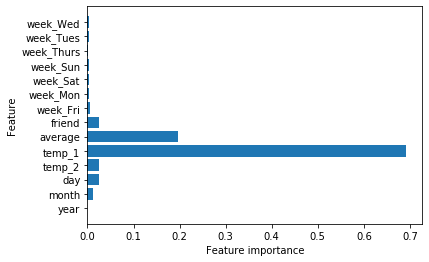

In [70]:
plot_feature_importances_cancer(rf)